In [2]:
!pip install pandas_datareader


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ------------------- -------------------- 1.8/3.8 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 14.6 MB/s eta 0:00:00


In [3]:
# Load necessary libraries
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Step 1: Define start and end dates for data
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2025, 1, 1)

print("Loading datasets...")

Loading datasets...


In [5]:
# Step 2: Pull datasets from FRED
home_prices = web.DataReader('CSUSHPISA', 'fred', start, end)
mortgage_30yr = web.DataReader('MORTGAGE30US', 'fred', start, end)
unemployment_rate = web.DataReader('UNRATE', 'fred', start, end)
consumer_price_index = web.DataReader('CPIAUCSL', 'fred', start, end)
gdp_data = web.DataReader('GDP', 'fred', start, end)
housing_starts_data = web.DataReader('HOUST', 'fred', start, end)


In [6]:
# Step 3: Combine all data into one dataframe
combined_df = pd.concat([home_prices, mortgage_30yr, unemployment_rate, consumer_price_index, gdp_data, housing_starts_data], axis=1)
combined_df.columns = ['HomePriceIndex', 'Mortgage30YRate', 'UnemploymentRate', 'CPI', 'GDP', 'HousingStarts']


In [7]:
# Quick look at missing data
print("\nMissing values before cleaning:\n", combined_df.isnull().sum())



Missing values before cleaning:
 HomePriceIndex      1263
Mortgage30YRate      260
UnemploymentRate    1263
CPI                 1263
GDP                 1464
HousingStarts       1263
dtype: int64


In [8]:
# Step 4: Fill missing values
combined_df = combined_df.interpolate()


In [9]:
# Drop any remaining nulls if any
combined_df = combined_df.dropna()

print("\nData preview after cleaning:")
print(combined_df.head())



Data preview after cleaning:
            HomePriceIndex  Mortgage30YRate  UnemploymentRate     CPI  \
DATE                                                                    
2000-01-07        100.7094             8.15              4.02  169.44   
2000-01-14        100.8668             8.18              4.04  169.58   
2000-01-21        101.0242             8.26              4.06  169.72   
2000-01-28        101.1816             8.25              4.08  169.86   
2000-02-01        101.3390             8.25              4.10  170.00   

                     GDP  HousingStarts  
DATE                                     
2000-01-07  10017.525312         1656.2  
2000-01-14  10032.871625         1676.4  
2000-01-21  10048.217937         1696.6  
2000-01-28  10063.564250         1716.8  
2000-02-01  10078.910562         1737.0  


In [10]:
# Step 5: Define independent variables (X) and dependent variable (y)
X = combined_df[['Mortgage30YRate', 'UnemploymentRate', 'CPI', 'GDP', 'HousingStarts']]
y = combined_df['HomePriceIndex']

In [11]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nTraining Linear Regression model...")



Training Linear Regression model...


In [12]:
# Step 7: Create and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [13]:
# Step 8: Make predictions
y_pred = regressor.predict(X_test)


In [14]:
# Step 9: Evaluate model performance
print("\nModel Evaluation Metrics:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")



Model Evaluation Metrics:
R2 Score: 0.9612
Mean Squared Error: 126.8865


In [15]:
# Step 10: See feature importance
print("\nFeature Importance (Coefficients):")
feature_effects = pd.DataFrame({
    'Feature': X.columns,
    'Impact': regressor.coef_
})
print(feature_effects)


Feature Importance (Coefficients):
            Feature    Impact
0   Mortgage30YRate  6.276674
1  UnemploymentRate  2.419487
2               CPI  0.695382
3               GDP  0.006483
4     HousingStarts  0.037882


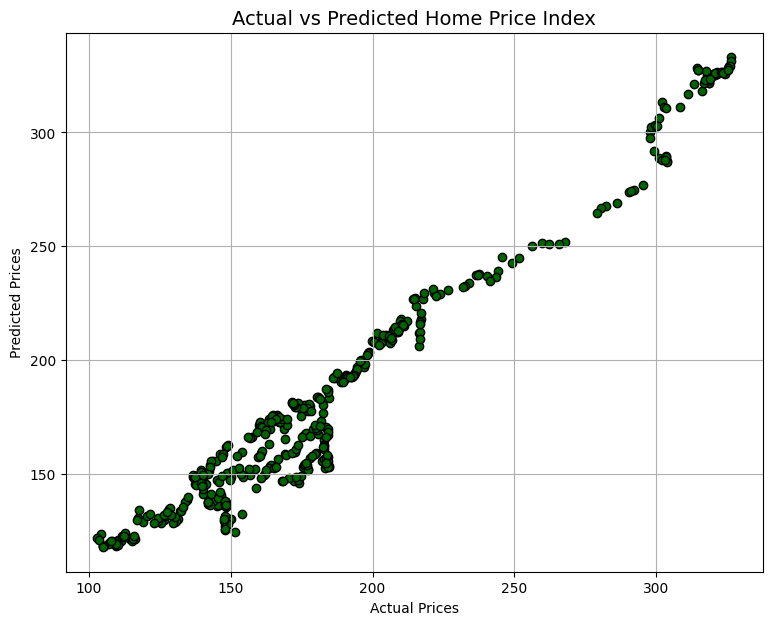

In [16]:
# Step 11: Plotting the actual vs predicted prices
plt.figure(figsize=(9,7))
plt.scatter(y_test, y_pred, color='darkgreen', edgecolor='k')
plt.title('Actual vs Predicted Home Price Index', fontsize=14)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()